In [1]:
%tensorflow_version 2.x
import tensorflow as tf 
print (tf.__version__)

# to Handle hdf5 file format we are importing h5py Liabrary 
import numpy as np
import h5py as h5 

TensorFlow 2.x selected.
2.1.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
f1 = h5.File('/content/drive/My Drive/Colab Notebooks/SVHN_single_grey1.h5', 'r') # opening that file and storing it in a f1 

In [0]:
ls = list (f1.keys()) # All key of hdf5 file is store in the list 

In [5]:
print ('Different folder in hdf5 file are : \n',ls) # printing the list 

Different folder in hdf5 file are : 
 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


In [6]:
#Checking the index,values and shape of the folder present in SVHN_single_grey1.h5 file 
for index, value in enumerate(ls):
    value = np.array (f1.get(value))
    
    print('shape of {}'.format(index) , value.shape)

shape of 0 (18000, 32, 32)
shape of 1 (42000, 32, 32)
shape of 2 (60000, 32, 32)
shape of 3 (18000,)
shape of 4 (42000,)
shape of 5 (60000,)


In [0]:
# Converting all folder cantains feature variable in hdf5 file to array so that we can use it further
X_test = np.array(f1.get('X_test'))
X_train = np.array(f1.get('X_train'))
X_val = np.array(f1.get('X_val'))

In [8]:
print ('Shape of training image is :',X_train[0].shape )
print ('Shape of test image is :',X_test[0].shape )
print ('Shape of validation image is :',X_val[0].shape )

Shape of training image is : (32, 32)
Shape of test image is : (32, 32)
Shape of validation image is : (32, 32)


In [0]:
# Converting all folder cantains target variable in hdf5 file to array so that we can use it further
y_test = np.array(f1.get('y_test'))
y_train = np.array(f1.get('y_train'))
y_val = np.array(f1.get('y_val'))

In [0]:
h5.File.close(f1) # closeing the hdf5 file 

In [11]:
print ('Datatype of X_test',type(X_test))
print ('Datatype of X_train',type(X_train))
print ('Datatype of X_val',type(X_val))

Datatype of X_test <class 'numpy.ndarray'>
Datatype of X_train <class 'numpy.ndarray'>
Datatype of X_val <class 'numpy.ndarray'>


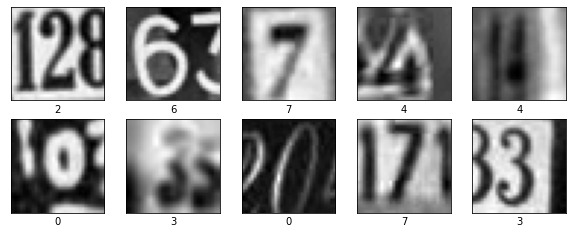

In [12]:
#Plot first 10 images in the triaining set and their labels
import matplotlib.pyplot as plt
# to Print plots in jupyter notebook 
%matplotlib inline 
plt.figure(figsize=(10,10)) # figure size 
for i in range(10): # looping for first 10 element of training set
    plt.subplot(5,5,i+1) # creating sub plot for  ploting figure 
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary) # Ploting binry figures 
    plt.xlabel(y_train[i]) # giving Lables to plot images 
plt.show()

# As it is stated that in the problem statment that we have to identify the image centered digit
# Training images with labes are ploted to gain 

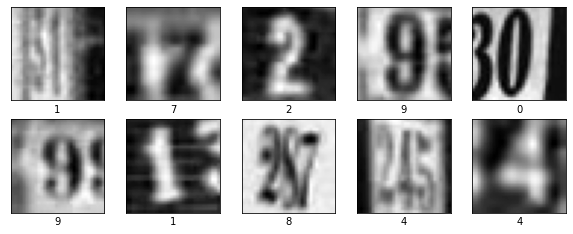

In [13]:
#Plot first 10 images in the test set and their labels
import matplotlib.pyplot as plt
# to Print plots in jupyter notebook 
%matplotlib inline 
plt.figure(figsize=(10,10)) # figure size 
for i in range(10): # looping for first 10 element of training set
    plt.subplot(5,5,i+1) # creating sub plot for  ploting figure 
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary) # Ploting binry figures 
    plt.xlabel(y_test[i]) # giving Lables to plot images 
plt.show()

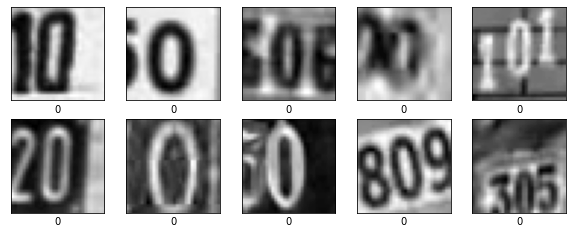

In [14]:
#Plot first 10 images in the validation set and their labels
import matplotlib.pyplot as plt
# to Print plots in jupyter notebook 
%matplotlib inline 
plt.figure(figsize=(10,10)) # figure size 
for i in range(10): # looping for first 10 element of training set
    plt.subplot(5,5,i+1) # creating sub plot for  ploting figure 
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_val[i], cmap=plt.cm.binary) # Ploting binry figures 
    plt.xlabel(y_val[i]) # giving Lables to plot images 
plt.show()

In [0]:
# Scaling the data 
X_train_reshaped = X_train/255
X_test_reshaped = X_test/255
X_val_reshaped = X_val/255


In [0]:
testy = tf.keras.utils.to_categorical(y_test)
trainy = tf.keras.utils.to_categorical(y_train)
valy = tf.keras.utils.to_categorical(y_val)

In [0]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Reshape
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.metrics import Accuracy


In [0]:
# As image size is 32*32 we can use dense layer neural network
# reseting the session 
clear_session()
# Initialize Sequential model
model = Sequential() # Instantiating keras sequential models from keras 

# First layer (input layer) of  32*32 = 1024 after flattening the image of 32*32 pixels
#Reshape data from 2D (32,32) to 1D after flattening the image 
model.add(Reshape((1024,),input_shape=(32,32,)))

#normalizing 
model.add(BatchNormalization())

#first Hidden layer
model.add(Dense(256,activation='relu'))

#second Hidden layer
model.add(Dense(128,activation='relu'))

#normalizing 
model.add(BatchNormalization())

#third Hidden layer
model.add(Dense(16,activation='relu'))

#Normalization
model.add(BatchNormalization())

# Final layer with activation function as softmax and 10 neurons 
model.add(Dense(10, activation='softmax'))

# Create optimizer with non-default learning rate
sgd_optimizer = SGD(lr=0.03)

# Compile the model
model.compile('sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dense (Dense)                (None, 256)               262400    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                2064      
_________________________________________________________________
batch_normalization_2 (Batch (None, 16)                6

In [0]:
#Initialize model, reshape & normalize data
model2 = Sequential()

#Reshape data from 2D (32,32) to 3D (32, 32, 1)
model2.add(Reshape((32,32,1),input_shape=(32,32,)))

#normalize data
model2.add(BatchNormalization())

#Add first convolutional layer
model2.add(Conv2D(32, #Number of filters 
                                 kernel_size=(5,5), #Size of the filter
                                 activation='relu')) #Size = 32-5+1 = 30

#Add second convolutional layer
model2.add(Conv2D(32, kernel_size=(5,5), activation='relu'))#Size of image = 24



#Flatten the output
model2.add(Flatten())

#Dense layer
model2.add(Dense(128, activation='relu'))

#Output layer
model2.add(Dense(10, activation='softmax'))

In [0]:
model2.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])


In [25]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 32, 32, 1)         0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 32, 1)         4         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        25632     
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               2359424   
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [26]:
  #Train the model
history = model.fit(X_train_reshaped,trainy,          
          validation_data=(X_val_reshaped,valy),
          epochs=10,
          batch_size=32)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 11s 260us/sample - loss: 1.8226 - accuracy: 0.3743 - val_loss: 1.3957 - val_accuracy: 0.5525
Epoch 2/10
42000/42000 [==============================] - 9s 226us/sample - loss: 1.2614 - accuracy: 0.5970 - val_loss: 0.9520 - val_accuracy: 0.7125
Epoch 3/10
42000/42000 [==============================] - 9s 225us/sample - loss: 1.0624 - accuracy: 0.6662 - val_loss: 0.8946 - val_accuracy: 0.7222
Epoch 4/10
42000/42000 [==============================] - 9s 226us/sample - loss: 0.9541 - accuracy: 0.7009 - val_loss: 0.9079 - val_accuracy: 0.7251
Epoch 5/10
42000/42000 [==============================] - 10s 227us/sample - loss: 0.8734 - accuracy: 0.7255 - val_loss: 0.6662 - val_accuracy: 0.7986
Epoch 6/10
42000/42000 [==============================] - 10s 227us/sample - loss: 0.8194 - accuracy: 0.7423 - val_loss: 0.6731 - val_accuracy: 0.7894
Epoch 7/10
42000/42000 [=======================

In [27]:
#Train the model2
history2 = model2.fit(X_train_reshaped,trainy,          
          validation_data=(X_val_reshaped,valy),
          epochs=10,
          batch_size=32)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 215s 5ms/sample - loss: 0.6320 - accuracy: 0.8085 - val_loss: 0.3816 - val_accuracy: 0.8878
Epoch 2/10
42000/42000 [==============================] - 216s 5ms/sample - loss: 0.3484 - accuracy: 0.8953 - val_loss: 0.2946 - val_accuracy: 0.9120
Epoch 3/10
42000/42000 [==============================] - 214s 5ms/sample - loss: 0.2565 - accuracy: 0.9219 - val_loss: 0.2650 - val_accuracy: 0.9251
Epoch 4/10
42000/42000 [==============================] - 215s 5ms/sample - loss: 0.1875 - accuracy: 0.9420 - val_loss: 0.2164 - val_accuracy: 0.9420
Epoch 5/10
42000/42000 [==============================] - 215s 5ms/sample - loss: 0.1431 - accuracy: 0.9541 - val_loss: 0.2111 - val_accuracy: 0.9463
Epoch 6/10
42000/42000 [==============================] - 211s 5ms/sample - loss: 0.1101 - accuracy: 0.9640 - val_loss: 0.2097 - val_accuracy: 0.9489
Epoch 7/10
42000/42000 [==========================

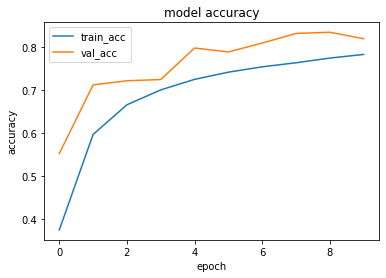

In [28]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc'], loc='upper left')
plt.show()


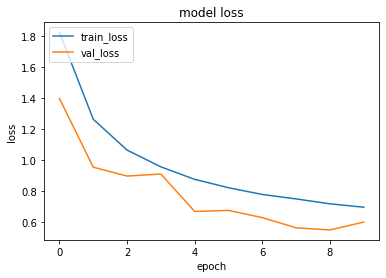

In [29]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc='upper left')
plt.show()

In [0]:
# Predicting our Both Models on Test data 
y_pred = model.predict(X_test_reshaped)
y_pred2 = model2.predict(X_test_reshaped)

In [31]:
# printing the confusion matrix 
from sklearn.metrics import classification_report,confusion_matrix
test1 = tf.cast(X_test_reshaped, tf.float32)
print(confusion_matrix(model.predict_classes(test1), y_test))
print ('\n Model2 Confusion Matrix \n ')
print(confusion_matrix(model2.predict_classes(test1), y_test))

[[1470   18   15   17   10   20   34   14   31   53]
 [  94 1510   64   98   84   66   66   84  102  101]
 [   6   22 1458   28   20   13   11   42   21   22]
 [  20   30   40 1248   14   98   22   22   47   38]
 [  33   43   27   20 1498   17   54   14   39   33]
 [  11   27   20  162   26 1417   76   23   65   49]
 [  54   25   14   18   46   50 1465   14  109   16]
 [  26   50   78   39   16   13   25 1523   29   34]
 [  21   20   19   27   14   32   48   12 1289   28]
 [  79   83   68   62   84   42   31   60   80 1430]]

 Model2 Confusion Matrix 
 
[[1677   31    7    7    9    4   48   12   26   55]
 [  19 1538   15   19   25    9   10   28   16   15]
 [   7   13 1584   27   15   12   13   20   19   36]
 [   7   13   27 1453   10   53   16   13   35   26]
 [  17   73   38   12 1683   15   33   12   31   42]
 [   4   11    4   85    8 1570   51    5   13   22]
 [  24   11    2   18   14   43 1571    5   61   13]
 [  19  107   74   42   16   14   10 1703   22   20]
 [  21   18   16

In [32]:
# printing Classification report for model
print("Please find the classification report as following: \n")
print(classification_report(model.predict_classes(test1),y_test))

Please find the classification report as following: 

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1682
           1       0.83      0.67      0.74      2269
           2       0.81      0.89      0.85      1643
           3       0.73      0.79      0.76      1579
           4       0.83      0.84      0.83      1778
           5       0.80      0.76      0.78      1876
           6       0.80      0.81      0.80      1811
           7       0.84      0.83      0.84      1833
           8       0.71      0.85      0.78      1510
           9       0.79      0.71      0.75      2019

    accuracy                           0.79     18000
   macro avg       0.79      0.80      0.80     18000
weighted avg       0.80      0.79      0.79     18000



In [35]:
# printing Classification report for model2
print("Please find the classification report as following: \n")
print(classification_report(model2.predict_classes(test1),y_test))

Please find the classification report as following: 

              precision    recall  f1-score   support

           0       0.92      0.89      0.91      1876
           1       0.84      0.91      0.87      1694
           2       0.88      0.91      0.89      1746
           3       0.85      0.88      0.86      1653
           4       0.93      0.86      0.89      1956
           5       0.89      0.89      0.89      1773
           6       0.86      0.89      0.87      1762
           7       0.94      0.84      0.89      2027
           8       0.86      0.88      0.87      1763
           9       0.86      0.89      0.87      1750

    accuracy                           0.88     18000
   macro avg       0.88      0.88      0.88     18000
weighted avg       0.88      0.88      0.88     18000



As we can se that our validation set is bigger then train set hence we are getting validation accuracy greater then training accuracy Initially. We can observe that model two is perfoming well in less epoch, on the other had our dense layer network can work more better if we iterate it for 50 epoch I have tried it. As it takes long time to train both model on 50 epochs I have use 10 epochs for both model and shown the results on the present Run.